In [1]:
""" 
    Importing necessary dependencies 
""" 

import numpy as np   # For math and matrix operations
import matplotlib.pyplot as plt  # To visualize the data


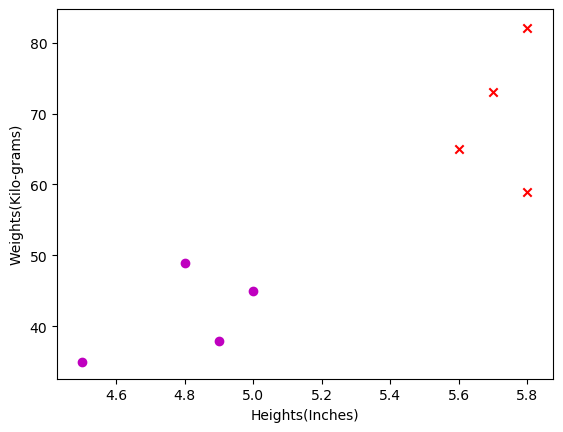

In [2]:
"""
    Creating toy data for our model
"""

X = np.array( [[4.5,35], [4.9,38], [5.0,45], [4.8,49], [5.8,59], [5.6,65], [5.7, 73], [5.8,82]] )
Y = np.array( [[-1], [-1], [-1], [-1], [1], [1], [1], [1], ] )

# Plotting Toy data
plt.figure()
for index, x in enumerate(X):
    if Y[index] == -1:
        plt.scatter(x[0], x[1], c = 'm', marker = 'o')
    else:
        plt.scatter(x[0], x[1], c = 'r', marker = 'x')

plt.xlabel("Heights(Inches)")
plt.ylabel("Weights(Kilo-grams)")
plt.show()

In [3]:
"""
    Defining Sign/Step activation function
"""

def sign_activation(z):
    if z < 0:
        return -1
    else:
        return 1

In [4]:
"""
    Defining Perceptron Training algorithm
"""

def perceptron_training_alg(X, Y, learning_rate):
    # Adding Bias to the input and Randomly initializing weights
    num_samples, num_features = X.shape

    X = np.hstack( (np.ones((num_samples, 1)), X) )
    W = np.random.rand(num_features+1).reshape((-1,1))

    # Running the algorithm until all the data points are correctly classified
    samples_misclassified = True
    while samples_misclassified:
        # Initially we'll assume that there are no misclassified samples
        samples_misclassified = False    
        for index, x in enumerate(X):
            if sign_activation(x.reshape((1,-1))@W) != Y[index]: # if samples misclassified
                samples_misclassified = True
                W = W + Y[index] * learning_rate * x.reshape((-1,1))     # Gradient Descent Step
    return W
            
            

In [5]:
"""
    Training to get the optimal weights
"""
W = perceptron_training_alg(X, Y, 0.1)

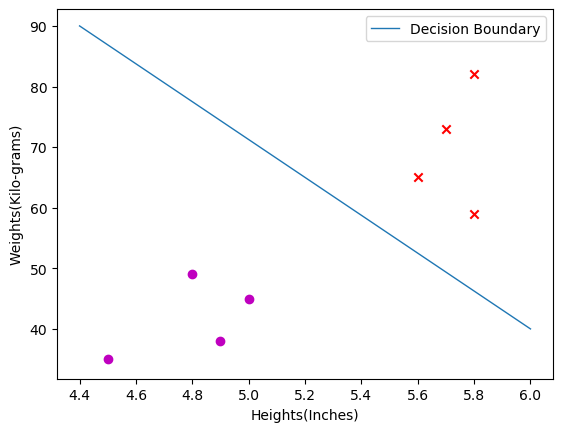

In [6]:
"""
    Plotting the decision boundary
"""
plt.figure()
plt.plot([4.4,6], [90,40], linewidth = 1, label = "Decision Boundary")
for index, x in enumerate(X):
    if Y[index] == -1:
        plt.scatter(x[0], x[1], c = 'm', marker = 'o')
    else:
        plt.scatter(x[0], x[1], c = 'r', marker = 'x')

plt.legend(loc = "best")
plt.xlabel("Heights(Inches)")
plt.ylabel("Weights(Kilo-grams)")
plt.show()